#B.jaya eswaran
#Christian College of Engineering and Technology

#House Price dataset of India

#1. Preprocessing a Dataset


In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle

In [6]:
!kaggle datasets download -d mohamedafsal007/house-price-dataset-of-india

house-price-dataset-of-india.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip /content/house-price-dataset-of-india.zip

Archive:  /content/house-price-dataset-of-india.zip
  inflating: House Price India.csv   


In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [9]:
df=pd.read_csv('/content/House Price India.csv')

In [10]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [12]:
df.head(10)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
5,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
6,6762813157,42491,5,3.25,3660,11995,2.0,0,2,3,...,2006,0,122008,52.7637,-114.050,3320,11241,3,72,785000
7,6762813599,42491,3,1.75,2240,10578,2.0,0,0,5,...,1923,0,122006,52.9254,-114.482,1570,10578,3,71,750000
8,6762813600,42491,3,2.50,2390,6550,1.0,0,2,4,...,1955,0,122009,52.8014,-114.598,2010,6550,1,73,750000
9,6762814461,42491,4,2.25,2200,11250,1.5,0,0,5,...,1920,0,122010,52.9145,-114.391,2320,10814,2,53,698000


In [13]:
df.tail()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
14615,6762830250,42734,2,1.5,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.0,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.0,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.0,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000
14619,6762831463,42734,3,1.0,900,4770,1.0,0,0,3,...,1969,2009,122018,52.5338,-114.552,900,3480,2,55,146000


In [14]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [15]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [16]:
df.shape

(14620, 23)

In [17]:
df.dtypes

id                                         int64
Date                                       int64
number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
Number of schools ne

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

#2. Building the ANN Model

#Spliting independent and dependent variables as X and y

In [23]:
X = df.drop('Price', axis=1)
y = df['Price']

#Spliting the train test separately

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

#Getting the shape of X, y train and test

In [25]:
print(f'\n shape of X_train - {X_train.shape}\n')
print(f' shape of X_test - {X_test.shape}\n')
print(f' shape of y_train - {y_train.shape}\n')
print(f' shape of y_test - {y_test.shape}\n')


 shape of X_train - (11696, 22)

 shape of X_test - (2924, 22)

 shape of y_train - (11696,)

 shape of y_test - (2924,)



#Model building

In [40]:
number_of_features = len(X.columns)

model = Sequential()

model.add(layer=Input(shape=number_of_features))

model.add(layer=Dense(units=32, activation='relu'))

model.add(layer=Dense(units=64, activation='relu'))

model.add(layer=Dense(units=128, activation='relu'))

model.add(layer=Dense(units=256, activation='relu'))

model.add(layer=Dense(units=512, activation='relu'))

model.add(layer=Dense(units=1024, activation='relu'))

model.add(layer=Dense(units=2048, activation='relu'))

model.add(layer=Dense(units=256, activation='relu'))

model.add(layer=Dense(units=128, activation='relu'))

model.add(layer=Dense(units=64, activation='relu'))

model.add(layer=Dense(units=32, activation='relu'))

model.add(layer=Dense(units=16, activation='relu'))

model.add(layer=Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                736       
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dense_17 (Dense)            (None, 512)               131584    
                                                                 
 dense_18 (Dense)            (None, 1024)              525312    
                                                                 
 dense_19 (Dense)            (None, 2048)             

#Compiling the model

In [27]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

#Model Training

In [28]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
366/366 [==============================] - 31s 76ms/step - loss: 38264060772352.0000 - mae: 1082568.3750 - mape: 260.8735
Epoch 2/100
366/366 [==============================] - 28s 77ms/step - loss: 816451092480.0000 - mae: 370056.5938 - mape: 84.8231
Epoch 3/100
366/366 [==============================] - 27s 74ms/step - loss: 127299592192.0000 - mae: 231804.8438 - mape: 53.1470
Epoch 4/100
366/366 [==============================] - 28s 75ms/step - loss: 127541764096.0000 - mae: 232088.7188 - mape: 53.2040
Epoch 5/100
366/366 [==============================] - 27s 74ms/step - loss: 128241926144.0000 - mae: 231958.6719 - mape: 53.0787
Epoch 6/100
366/366 [==============================] - 26s 72ms/step - loss: 126404845568.0000 - mae: 231094.8281 - mape: 53.2329
Epoch 7/100
366/366 [==============================] - 26s 71ms/step - loss: 126682529792.0000 - mae: 230828.2500 - mape: 53.0245
Epoch 8/100
366/366 [==============================] - 27s 73ms/step - loss: 126916337

#Prediting the unseen dataset

In [29]:
y_pred = model.predict(X_test)

92/92 [==============================] - 1s 10ms/step


In [30]:
y_pred

array([[503975.38],
       [503974.44],
       [504415.94],
       ...,
       [503988.56],
       [503974.94],
       [504081.5 ]], dtype=float32)

In [31]:
y_test

12149    640000
13581    650000
11595    325000
2769     373000
7393     355000
          ...  
7362     497000
11132    400000
142      366750
1405     276000
6184     569000
Name: Price, Length: 2924, dtype: int64

#Visual representation of the acutual value vs the predicted value

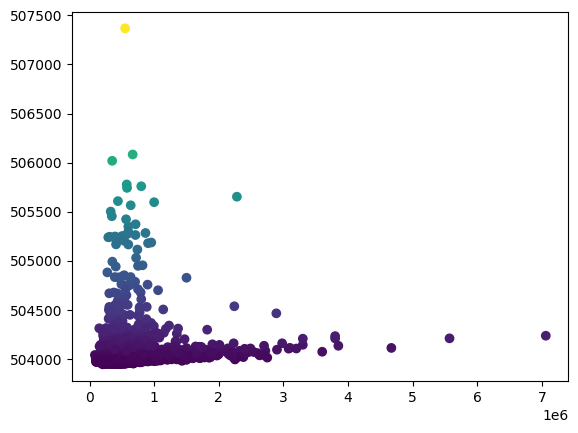

In [32]:
plt.scatter(y_test, y_pred, c=y_pred)
plt.show()

In [33]:
pd.DataFrame({'Actual Value':y_test.values.flatten(), 'Predicted Value':y_pred.flatten()})

,Actual Value,Predicted Value
0,640000,503975.3750
1,650000,503974.4375
2,325000,504415.9375
3,373000,503982.8750
4,355000,504002.3125
...,...,...
2919,497000,503977.0625
2920,400000,503992.5000
2921,366750,503988.5625
2922,276000,503974.9375


#3. Testing the Model

#Predicted values of data

In [43]:
r2_score(y_pred=y_pred, y_true=y_test) * 100

-1.4215828919018403